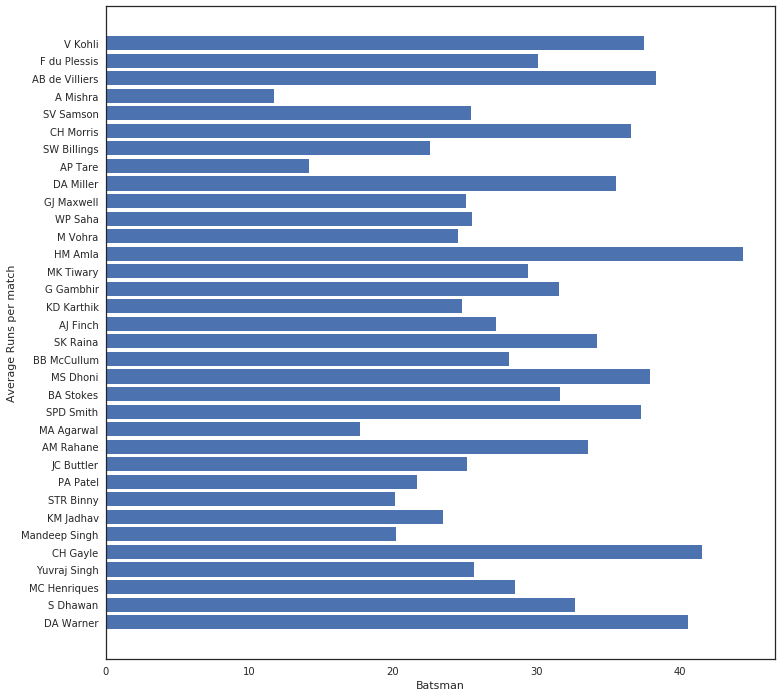

In [16]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
md=pd.read_csv("/home/vaibhav/sem6/DMA/matches.csv",index_col=0)
dld=pd.read_csv("/home/vaibhav/sem6/DMA/deliveries.csv")
Bman=['DA Warner','S Dhawan','MC Henriques' ,'Yuvraj Singh' ,'CH Gayle' ,'Mandeep Singh' ,'KM Jadhav','STR Binny','PA Patel','JC Buttler','AM Rahane','MA Agarwal','SPD Smith','BA Stokes','MS Dhoni','BB McCullum','SK Raina','AJ Finch','KD Karthik','G Gambhir','MK Tiwary','HM Amla','M Vohra','WP Saha','GJ Maxwell','DA Miller','AP Tare','SW Billings','CH Morris','SV Samson','A Mishra','AB de Villiers','F du Plessis','V Kohli']
#measuring each player's performance
C_runs=[]
C_nouts=[]
C_avg=[]
C_sr=[]
xa=range(1,35)
for i in Bman:
    rq=dld[dld['batsman']==i]
    outs=dld[np.logical_and(dld['player_dismissed']==i,dld['is_super_over']==0)]
    Truns=rq['batsman_runs'].sum()
    T_matches=len(rq['match_id'].unique())
    Touts=outs.shape[0]
    Tnouts=T_matches-Touts
    balls=rq[rq['wide_runs']==0]
    Tballs=balls.shape[0]
    Tavg=Truns/Touts
    Tsr=Truns/Tballs*100
    C_runs+=[Truns]
    C_nouts+=[Tnouts]
    C_avg+=[Tavg]
    C_sr+=[Tsr]
plt.figure(figsize=(12,12))
sb.set(font_scale=1)
sb.set_style("white")
plt.barh(xa,C_avg,tick_label=Bman)
#plt.xticks(rotation=60,ha='right')
plt.xlabel('Batsman')
plt.ylabel('Average Runs per match')
plt.show()

[325, 311]


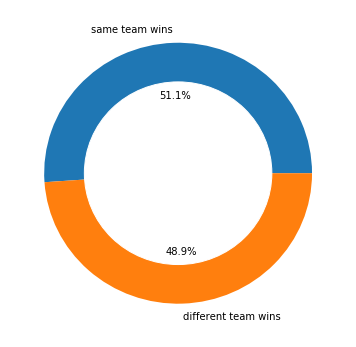

In [41]:
#toss winning and match winning
sameWin=md[md['toss_winner']==md['winner']].shape[0]
diffWin=md[md['toss_winner']!=md['winner']].shape[0]
winL=[sameWin,diffWin]
plt.figure(figsize=(6,6))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(winL,labels=['same team wins','different team wins'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [42]:
#victory by maximum runs
maxruns=max(md['win_by_runs'])
match_mxruns=md[md['win_by_runs']==maxruns]
print(match_mxruns)
match_mxruns.head()

    season   city        date           team1             team2  \
id                                                                
44    2017  Delhi  2017-05-06  Mumbai Indians  Delhi Daredevils   

         toss_winner toss_decision  result  dl_applied          winner  \
id                                                                       
44  Delhi Daredevils         field  normal           0  Mumbai Indians   

    win_by_runs  win_by_wickets player_of_match             venue  \
id                                                                  
44          146               0     LMP Simmons  Feroz Shah Kotla   

        umpire1    umpire2  umpire3  
id                                   
44  Nitin Menon  CK Nandan      NaN  


,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
44,2017,Delhi,2017-05-06,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan,NaN


In [15]:
#victory by maximum wickets
maxwick=max(md['win_by_wickets'])
match_mxwick=md[md['win_by_wickets']==maxwick]
match_mxwick.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
35,2017,Chandigarh,2017-04-30,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,10,Sandeep Sharma,"Punjab Cricket Association IS Bindra Stadium, ...",YC Barde,CK Nandan,NaN
72,2008,Mumbai,2008-04-27,Mumbai Indians,Deccan Chargers,Deccan Chargers,field,normal,0,Deccan Chargers,0,10,AC Gilchrist,Dr DY Patil Sports Academy,Asad Rauf,SL Shastri,NaN
120,2009,Cape Town,2009-04-19,Kings XI Punjab,Delhi Daredevils,Delhi Daredevils,field,normal,1,Delhi Daredevils,0,10,DL Vettori,Newlands,MR Benson,SD Ranade,NaN
184,2010,Bangalore,2010-03-18,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,JH Kallis,M Chinnaswamy Stadium,K Hariharan,DJ Harper,NaN


In [29]:
# matches tied
tie=md[md['result']=='tie']
print(tie)
tie.head()

     season       city        date                        team1  \
id                                                                
34     2017     Rajkot  2017-04-29                Gujarat Lions   
126    2009  Cape Town  2009-04-23             Rajasthan Royals   
190    2010    Chennai  2010-03-21              Kings XI Punjab   
388    2013  Hyderabad  2013-04-07  Royal Challengers Bangalore   
401    2013  Bangalore  2013-04-16             Delhi Daredevils   
476    2014  Abu Dhabi  2014-04-29             Rajasthan Royals   
536    2015  Ahmedabad  2015-04-21             Rajasthan Royals   

                           team2                  toss_winner toss_decision  \
id                                                                            
34                Mumbai Indians                Gujarat Lions           bat   
126        Kolkata Knight Riders        Kolkata Knight Riders         field   
190          Chennai Super Kings          Chennai Super Kings         field   
3

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
34,2017,Rajkot,2017-04-29,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,tie,0,Mumbai Indians,0,0,KH Pandya,Saurashtra Cricket Association Stadium,AK Chaudhary,CB Gaffaney,NaN
126,2009,Cape Town,2009-04-23,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,field,tie,0,Rajasthan Royals,0,0,YK Pathan,Newlands,MR Benson,M Erasmus,NaN
190,2010,Chennai,2010-03-21,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,tie,0,Kings XI Punjab,0,0,J Theron,"MA Chidambaram Stadium, Chepauk",K Hariharan,DJ Harper,NaN
388,2013,Hyderabad,2013-04-07,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore,bat,tie,0,Sunrisers Hyderabad,0,0,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",AK Chaudhary,S Ravi,NaN
401,2013,Bangalore,2013-04-16,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,tie,0,Royal Challengers Bangalore,0,0,V Kohli,M Chinnaswamy Stadium,M Erasmus,VA Kulkarni,NaN


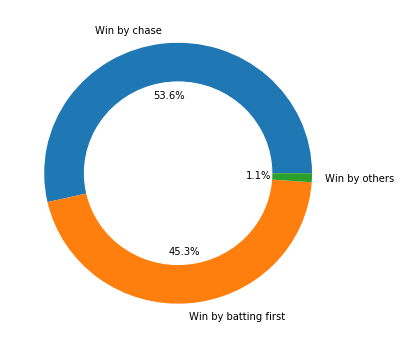

In [46]:
#win by chase
tie=7
nontie=md[md['result']!='tie']
nonChaseWin=md[md['win_by_runs']!=0]
ChaseWin=md[md['win_by_wickets']!=0]
#print(ChaseWin.shape[0],nonChaseWin.shape[0])
ChWin=[ChaseWin.shape[0],nonChaseWin.shape[0],tie]
plt.figure(figsize=(6,6))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(ChWin,labels=['Win by chase','Win by batting first','Win by others'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

[73, 10, 77, 70, 71, 92, 13, 62, 63, 79] [48.026315789473685, 62.5, 52.02702702702703, 47.2972972972973, 55.26315789473685, 58.59872611464968, 43.333333333333336, 42.17687074829932, 53.38983050847458, 60.30534351145038]


<Container object of 10 artists>

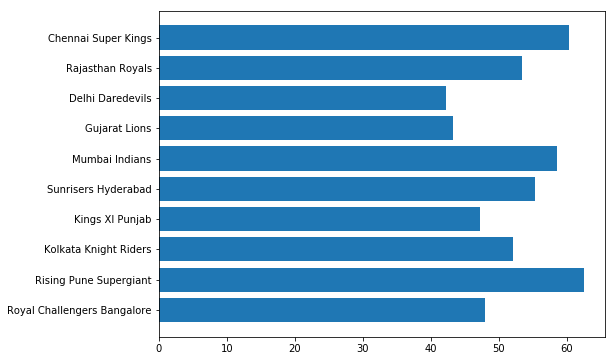

In [40]:
#team winning percentage
teams=['Royal Challengers Bangalore','Rising Pune Supergiant','Kolkata Knight Riders','Kings XI Punjab','Sunrisers Hyderabad','Mumbai Indians','Gujarat Lions','Delhi Daredevils','Rajasthan Royals','Chennai Super Kings']
C_winMatches=[]
C_winperc=[]
for i in teams:
    rq1=md[md['winner']==i]
    winMatches=rq1.shape[0]
    C_winMatches+=[winMatches]
    rq2=md[np.logical_or(md['team1']==i,md['team2']==i)]
    Tmatch=rq2.shape[0]
    C_winperc+=[winMatches/Tmatch*100]

C_winMatches[4]+=md[md['winner']=='Deccan Chargers'].shape[0]

plt.figure(figsize=(8,6))
plt.barh(range(1,11),C_winperc,tick_label=teams)

<Container object of 23 artists>

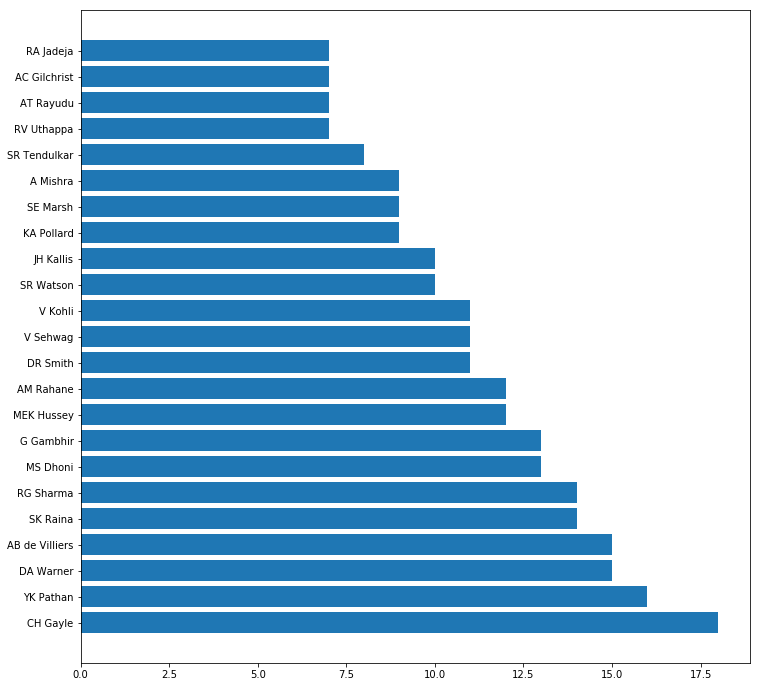

In [17]:
#most frequent man of the match
from statistics import mode
from collections import Counter
#bestPl=mode(md['player_of_match'])
#Plcount=md[md['player_of_match']==bestPl].shape[0]
plt.figure(figsize=(12,12))
#pldict=Counter(md['player_of_match'])
dict1={'CH Gayle': 18, 'YK Pathan': 16, 'DA Warner': 15, 'AB de Villiers': 15, 'SK Raina': 14, 'RG Sharma': 14, 'MS Dhoni': 13, 'G Gambhir': 13, 'MEK Hussey': 12, 'AM Rahane': 12, 'DR Smith': 11, 'V Sehwag': 11, 'V Kohli': 11, 'SR Watson': 10, 'JH Kallis': 10, 'KA Pollard': 9, 'SE Marsh': 9, 'A Mishra': 9, 'SR Tendulkar': 8, 'RV Uthappa': 7, 'AT Rayudu': 7, 'AC Gilchrist': 7, 'RA Jadeja': 7}
names=list(dict1.keys())
plt.barh(range(1,len(dict1)+1),list(dict1.values()),tick_label=names)

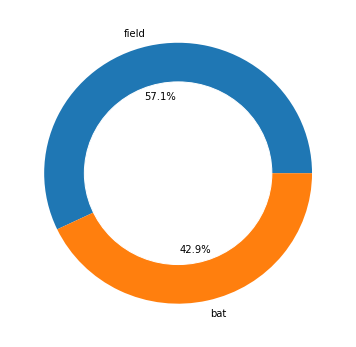

In [33]:
#toss decisions
Tfield=md[md['toss_decision']=='field'].shape[0]
Tbat=md[md['toss_decision']=='bat'].shape[0]
size=[Tfield,Tbat]
plt.figure(figsize=(6,6))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size,labels=['choose to field','choose to bat',],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [44]:
#attributes
#for i in md: 
    #print(i)
print(md.shape)
print(dld.shape)
#for i in dld: 
    #print(i)
#print(list(dld))

(636, 17)
(150460, 21)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

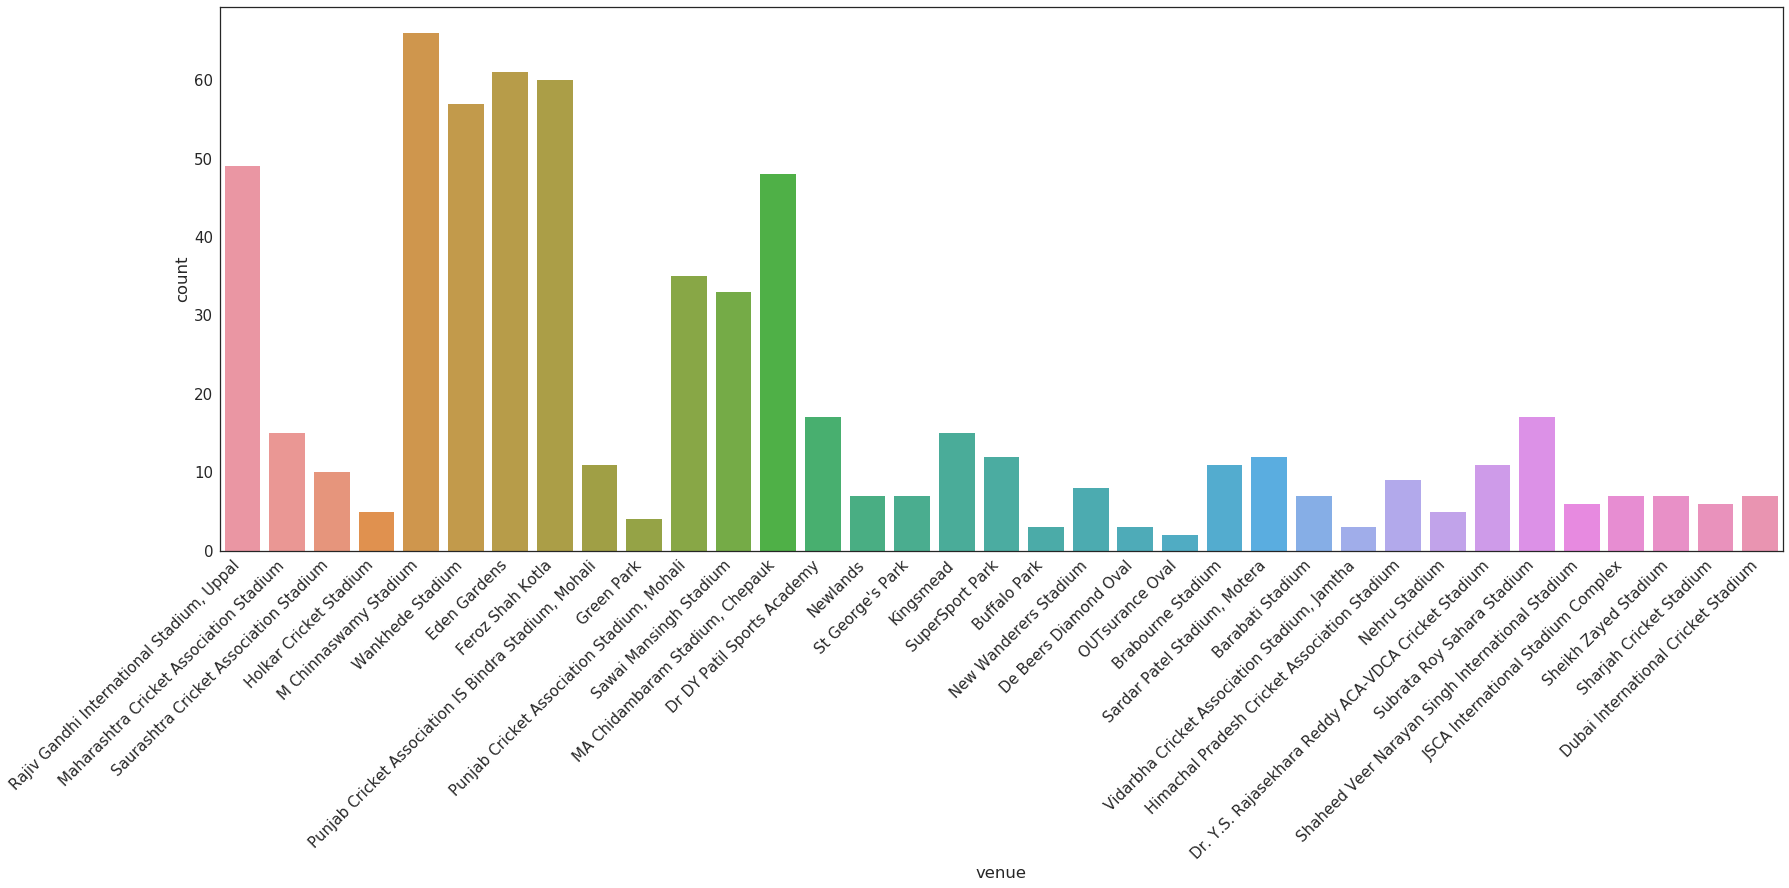

In [64]:
plt.figure(figsize=(28,10))
sb.countplot(x='venue',data=md)
sb.set(font_scale=1.5)
sb.set_style("white")
plt.xticks(rotation=45,ha='right')

In [57]:
print()

(46, 2)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 <a list of 46 Text xticklabel objects>)

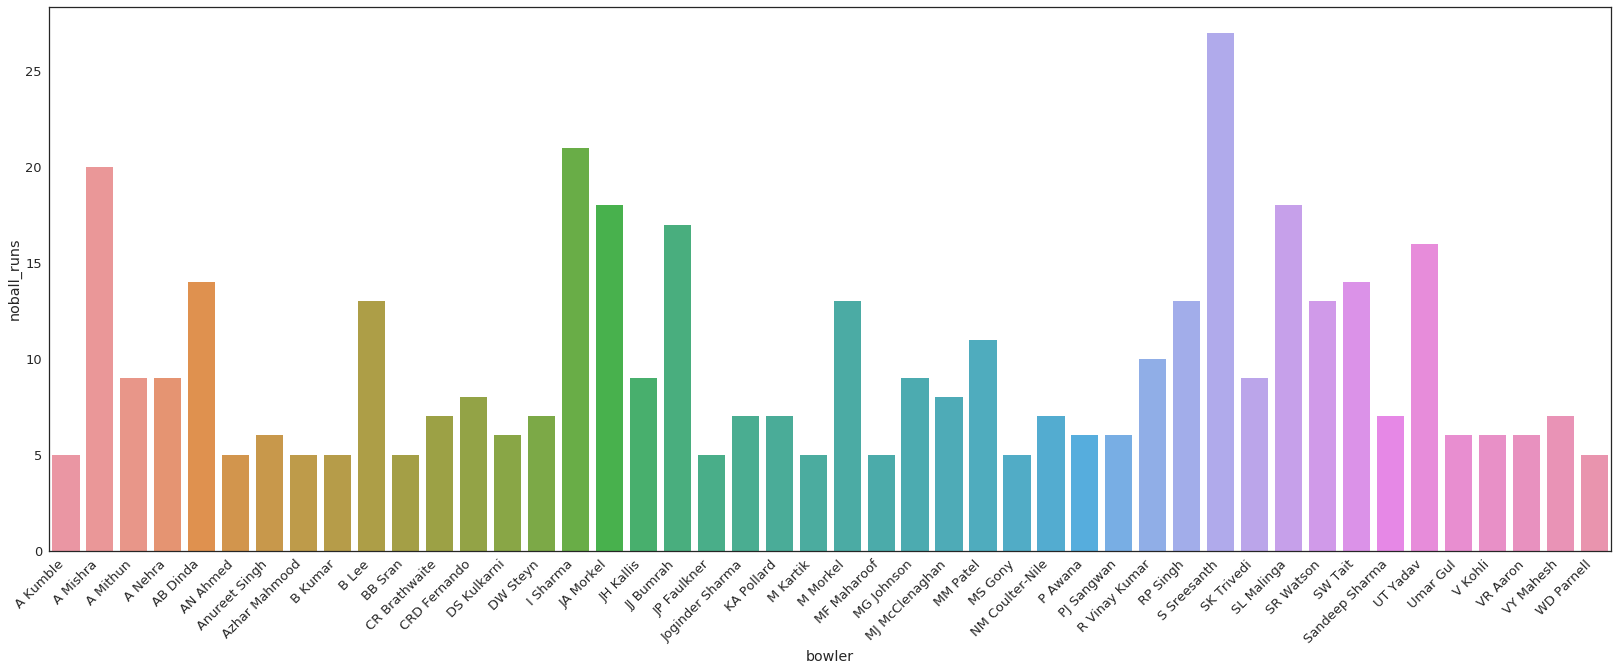

In [56]:
noball=dld[dld['noball_runs']!=0]
noball2=noball.loc[:,['bowler','noball_runs']]
nbr=noball2.groupby('bowler', as_index=False).agg({"noball_runs": "sum"})
nbr1=nbr[nbr['noball_runs']>4]
print(nbr1.shape)
plt.figure(figsize=(28,10))
sb.set(font_scale=1.3)
sb.set_style("white")
sb.barplot(x='bowler',y='noball_runs',data=nbr1)
plt.xticks(rotation=45,ha='right')

In [34]:
print()

In [54]:
#nbs=noball.groupby('bowler')[['noball_runs']].sum() 
noball.head()

,bowler,noball_runs
9,A Choudhary,1
182,MC Henriques,1
1440,JJ Bumrah,1
1443,JJ Bumrah,1
1545,MJ McClenaghan,1


In [63]:
nbs1=noball.groupby('bowler', as_index=False).agg({"noball_runs": "sum"})
nbs1.head()

,bowler,noball_runs
0,A Ashish Reddy,2
1,A Choudhary,1
2,A Kumble,5
3,A Mishra,20
4,A Mithun,9


In [30]:
print(md[md['toss_decision']=='field'].shape[0])

363


In [31]:
print(md[md['toss_decision']=='bat'].shape[0])

273


In [4]:
dld.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
tout=dld[dld['dismissal_kind']!='']
tout.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


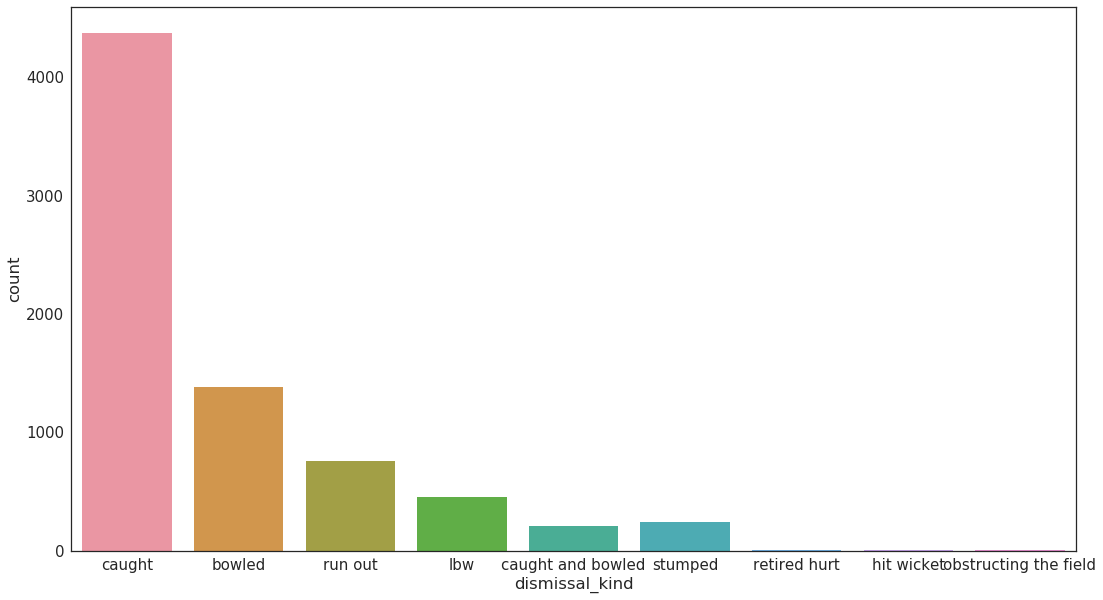

In [6]:
plt.figure(figsize=(18,10))
sb.set(font_scale=1.5)
sb.set_style("white")
sb.countplot(x='dismissal_kind',data=dld)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

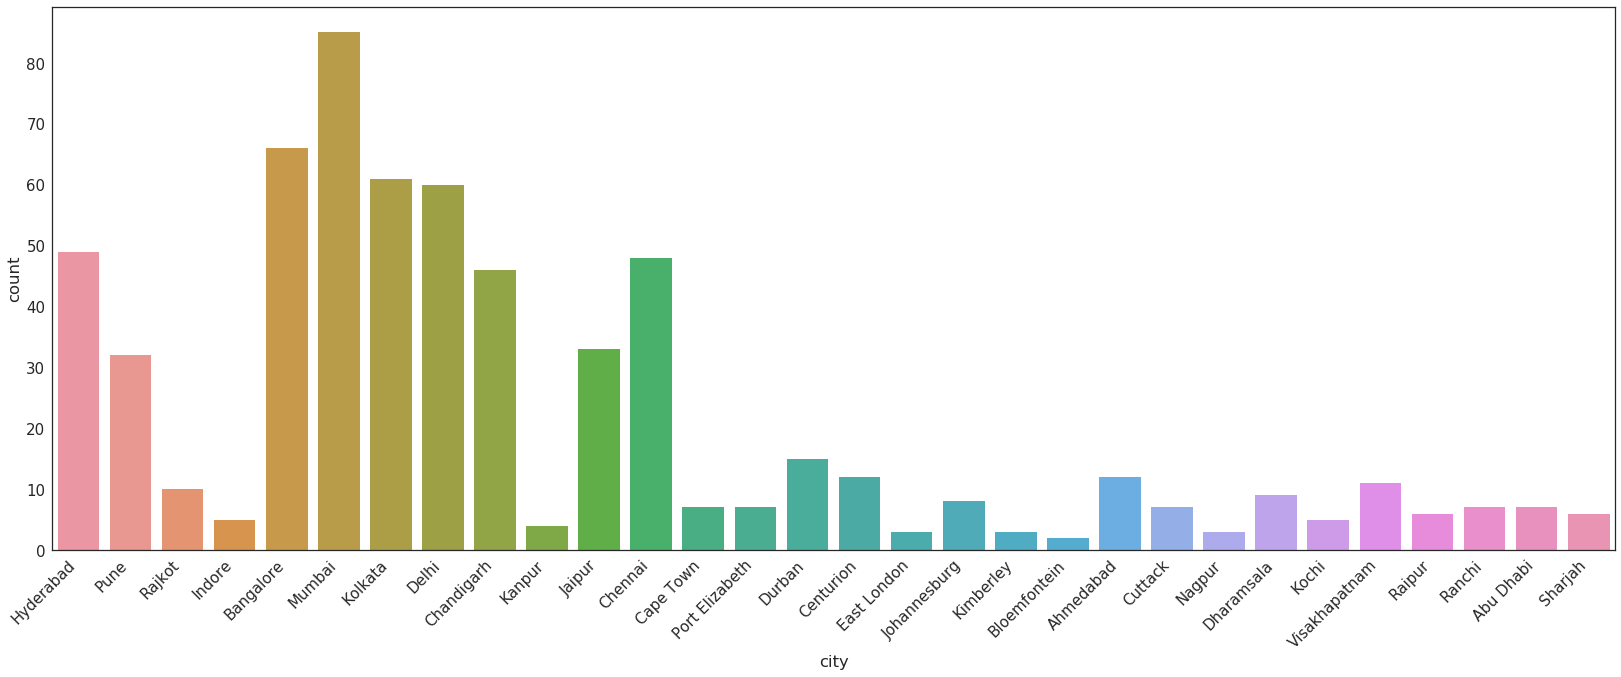

In [10]:
plt.figure(figsize=(28,10))
sb.set(font_scale=1.5)
sb.set_style("white")
sb.countplot(x='city',data=md)
plt.xticks(rotation=45,ha='right')

(29, 2)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text xticklabel objects>)

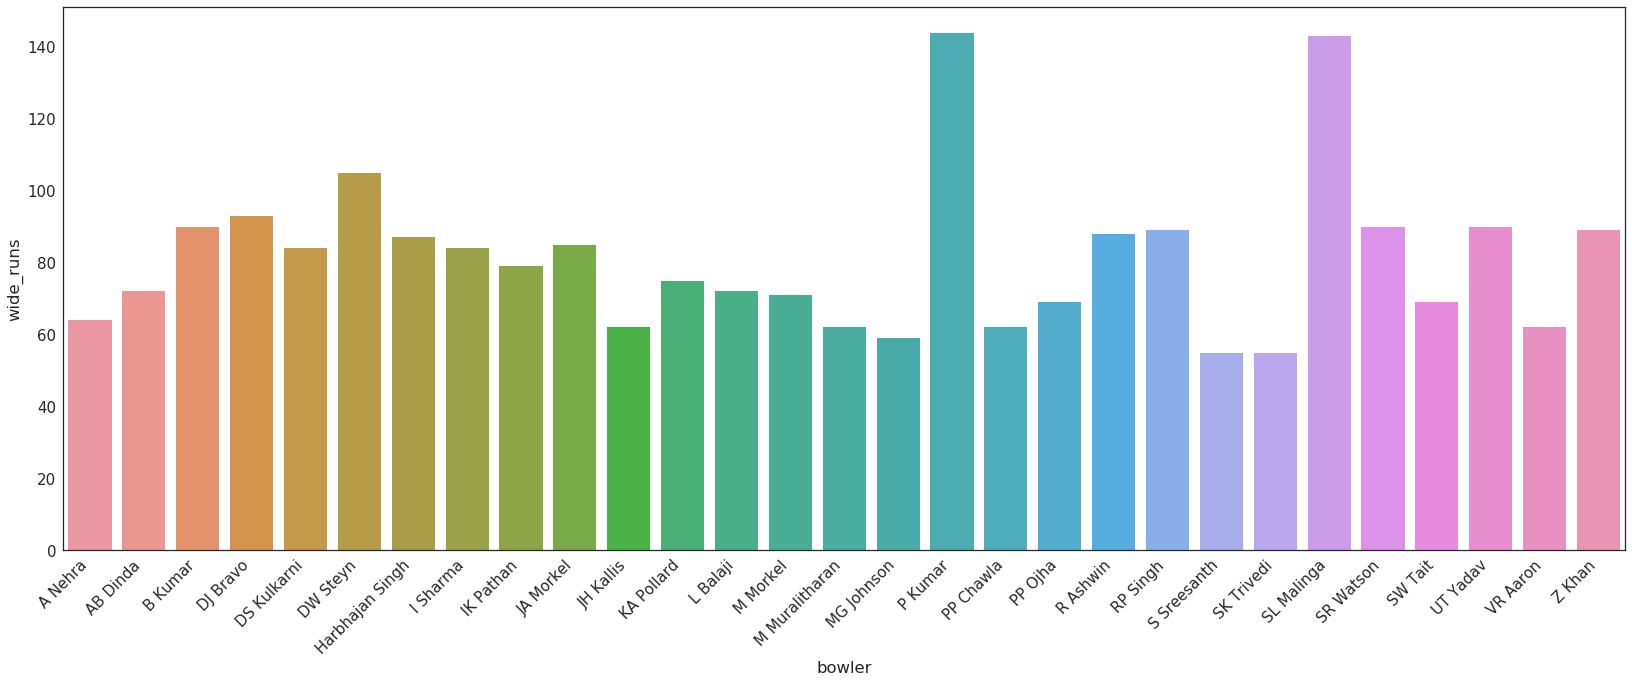

In [60]:
noball=dld[dld['wide_runs']!=0]
noball2=noball.loc[:,['bowler','wide_runs']]
nbr=noball2.groupby('bowler', as_index=False).agg({"wide_runs": "sum"})
nbr1=nbr[nbr['wide_runs']>50]
print(nbr1.shape)
plt.figure(figsize=(28,10))
sb.set(font_scale=1.5)
sb.set_style("white")
sb.barplot(x='bowler',y='wide_runs',data=nbr1)
plt.xticks(rotation=45,ha='right')

In [45]:
Season :  
City :  
Date : Team 1 : 
Team 2 : 
Toss_winner: 
Toss_decision 
Result:  or tie
Dl_applied:  or not
Winner: Win_by_runs:  team won
Win_by_wickets: team won
Player_of_match:  
Venue: 
Umpire:Match_id: 
Inning:  on
Batting_team
Bowling_team
Over
Ball
Batsman
Non_striker
Bowler
Wide_runs
Bye_runs
Legbye_runs
Noball_runs
Penalty_runs
Batsman_runs
Extra_runs
Total_runs
Player_dismissed
Dismissal_kind
Fielder


SyntaxError: invalid syntax (<ipython-input-45-52d85e49b900>, line 3)